## Setup

In [31]:
# use full window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [32]:
import os
os.chdir('..')
from matplotlib import pyplot as plt
import numpy as np

import virl

## Simulation

In [33]:
def run(action):
    env = virl.Epidemic(stochastic=False, noisy=False)
    states = []
    rewards = []
    done = False

    s = env.reset()
    states.append(s)
    while not done:
        s, r, done, i = env.step(action=action) # deterministic agent
        states.append(s)
        rewards.append(r)
    return (states, rewards)

## Analysis

In [68]:
def plot(action, action_text, states, rewards):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    labels = ['s[0]: susceptibles', 's[1]: infectious', 's[2]: quarantined', 's[3]: recovereds']
    states = np.array(states)
    for i in range(4):
        axes[0].plot(states[:,i], label=labels[i])
    axes[0].set_xlabel('weeks since start of epidemic')
    axes[0].set_ylabel('State s(t)')
    axes[0].set_title("Action = " + action_text)
    axes[0].legend()
    axes[1].plot(rewards);
    axes[1].set_title("Total reward = " + str(np.sum(rewards)))
    axes[1].set_xlabel('weeks since start of epidemic')
    axes[1].set_ylabel('reward r(t)')

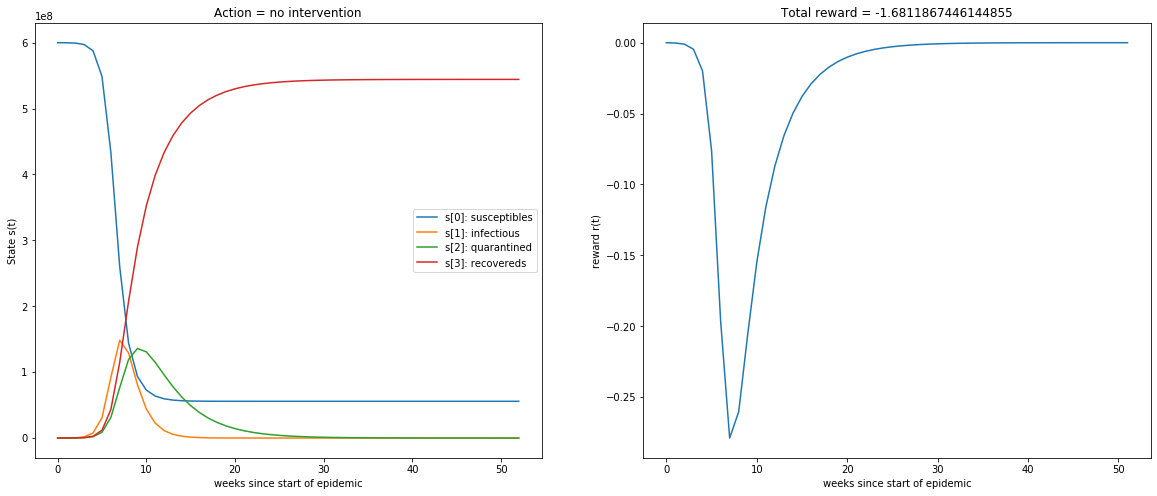

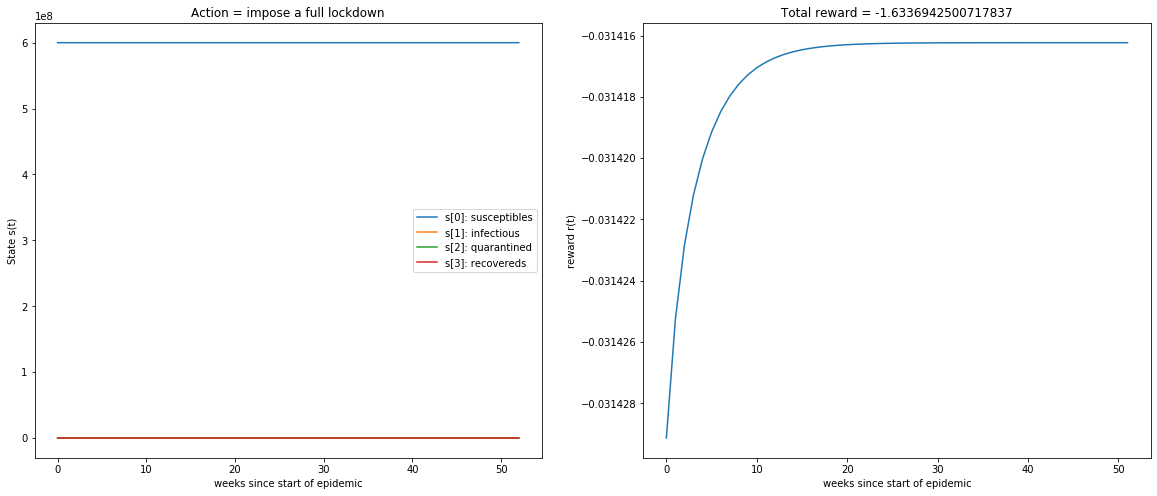

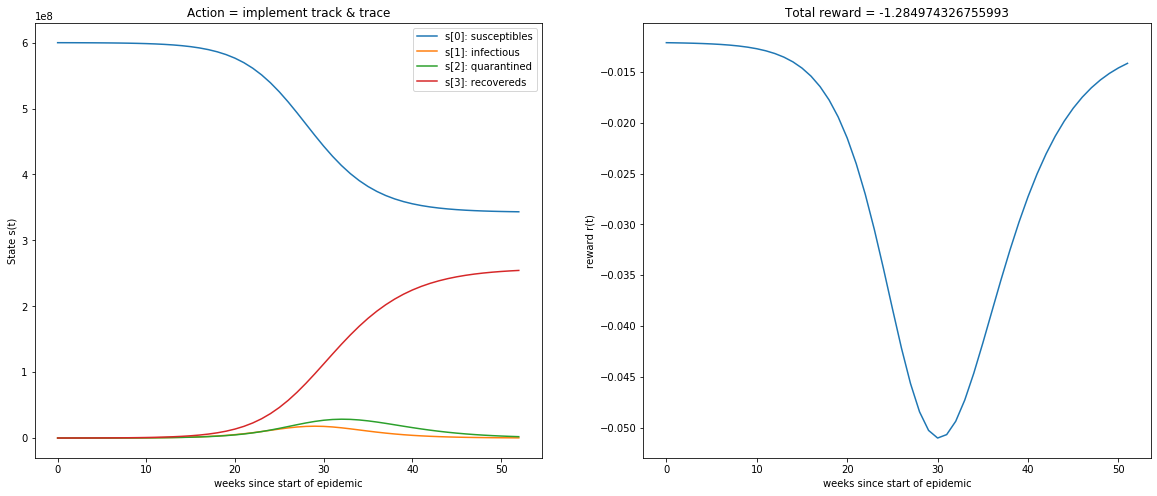

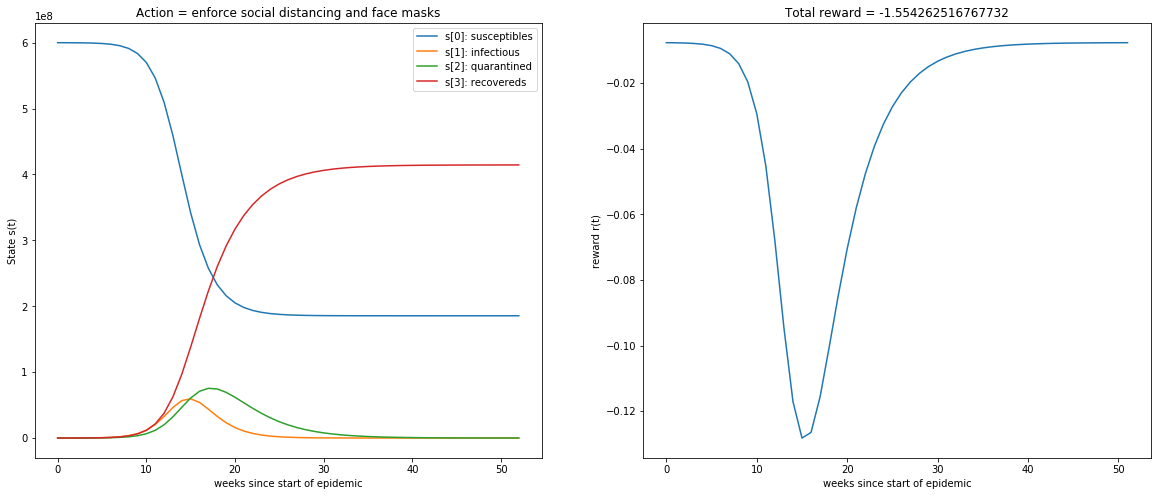

In [69]:
actions = ["no intervention", "impose a full lockdown", "implement track & trace", "enforce social distancing and face masks"]
for action, action_text in enumerate(actions):
    states, rewards = run(action)
    plot(action, action_text, states, rewards)